# [장바구니에 담은 상품 데이터를 활용하여 사용자에게 상품 추천]

## 라이브러리 정의

In [339]:
# 단어 임베딩
from gensim.models import Word2Vec

# View
from matplotlib import rc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## 함수, 데이터 정의

In [340]:
# 그래프 그려주는 함수
def plot_2d_graph(vocabs, xs, ys):
    rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(8 ,6))
    plt.scatter(xs, ys, marker = 'o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

In [360]:
# 장바구니 데이터 정의 (한줄이 하나의 장바구니 데이터)
data = [
          ['딸기쨈','식빵','양배추','마요네즈','케찹'],
          ['포도쩀','식빵','양배추','마요네즈','케찹'],
          ['식빵','계란','양상추','케찹','베이컨'],
          ['돼지고기','집계','상추','쌈장','파'],
          ['소고기','집계','배추','소금','파'],
          ['단무지','맛살','김','쌀','햄'],
          ['김','쌀','단무지','햄','우엉']
      ]

## 단어 임베딩

In [361]:
# size : 벡터 차원
# window : 주변 단어 수 (앞 뒤로 4 단어 씩)
# min_count : 50번 미만 단어는 분석에서 제외 
# iter : 5000회 반복 학습
# sg : 모델 (0: CBOW | 1: skip-gram)
# workers : 동시에 처리할 작업 수
model = Word2Vec(data, size=300, window=4, min_count=1, iter=5000, sg=1, workers=4)

In [362]:
# 단어의 벡터를 구한다.
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in word_vectors.vocab.keys()]

In [363]:
# 두 단어의 유사도 
print(word_vectors.similarity(w1='식빵', w2='김'))

0.30263782


In [364]:
# 두 단어의 유사도
print(word_vectors.similarity(w1='돼지고기', w2='배추'))

0.9846972


In [365]:
# 식빵이랑 양배추를 산사람에게 추천할 상품은 ?
word_vectors.most_similar(positive=['식빵', '양배추'])

[('포도쩀', 0.9988817572593689),
 ('마요네즈', 0.9984250068664551),
 ('케찹', 0.9979124069213867),
 ('딸기쨈', 0.9964978098869324),
 ('계란', 0.9810994863510132),
 ('베이컨', 0.9800444841384888),
 ('양상추', 0.9776391983032227),
 ('쌀', 0.3006083369255066),
 ('김', 0.2924817204475403),
 ('햄', 0.2912694215774536)]

In [367]:
# 김을 산사람에게 추천할 상품은 ?
word_vectors.most_similar(positive=['김'])

[('쌀', 0.99942946434021),
 ('맛살', 0.9993976354598999),
 ('우엉', 0.9991198182106018),
 ('단무지', 0.9990296959877014),
 ('햄', 0.9989983439445496),
 ('배추', 0.3499002754688263),
 ('파', 0.34812408685684204),
 ('집계', 0.3456333875656128),
 ('돼지고기', 0.3435102701187134),
 ('소고기', 0.3430193364620209)]

## 그래프

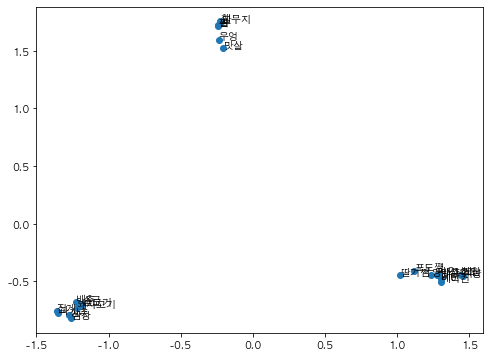

In [368]:
# 그래프 그리기
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]
plot_2d_graph(vocabs, xs, ys)

In [369]:
# 최종 모델을 저장한다.
model.save('word2vec.model')

In [370]:
# 저장한 모델을 읽어서 이용한다.
model = Word2Vec.load('word2vec.model')

In [378]:
# 소고기를 산사람에게 추천할 상품은 ?
word_vectors.most_similar(positive=['소고기'])

[('소금', 0.9993100762367249),
 ('배추', 0.999143660068512),
 ('집계', 0.9960213303565979),
 ('파', 0.9958965182304382),
 ('돼지고기', 0.9858182668685913),
 ('쌈장', 0.9850137233734131),
 ('상추', 0.984910786151886),
 ('쌀', 0.3511732220649719),
 ('김', 0.3430192768573761),
 ('맛살', 0.33959776163101196)]